In [2]:
import talib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime
import MetaTrader5 as mt5
import pandas_ta as ta

In [83]:
if not mt5.initialize(login=114781990, server="Exness-MT5Trial6",password="Mypassword$1234"):
            print("initialize() failed, error code =",mt5.last_error())
            quit()
        
login = 114781990
password = 'Mypassword$1234'
server = 'Exness-MT5Trial6'

mt5.login(login, password, server)

rate = mt5.copy_rates_from('EURUSDm', mt5.TIMEFRAME_M15, datetime.datetime.now(), 3000)

nf = pd.DataFrame(rate)
#         print('getting data')

nf['date']=pd.to_datetime(nf['time'], unit='s')

nf.set_index(np.arange(len(nf)), inplace = True)
nf = nf.drop(['spread', 'real_volume', 'tick_volume', 'time'], axis='columns')


# nf.to_excel('EURUSD.xlsx')

df = nf.iloc[-500:]  # First half
# df2 = nf.iloc[500:]  # Second half

df['atr'] = ta.atr(high=df.high, low=df.low, close=df.close)

df['atr'] = df.atr.rolling(window=30).mean()



In [84]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from IPython.display import HTML
pd.set_option('mode.chained_assignment', None)

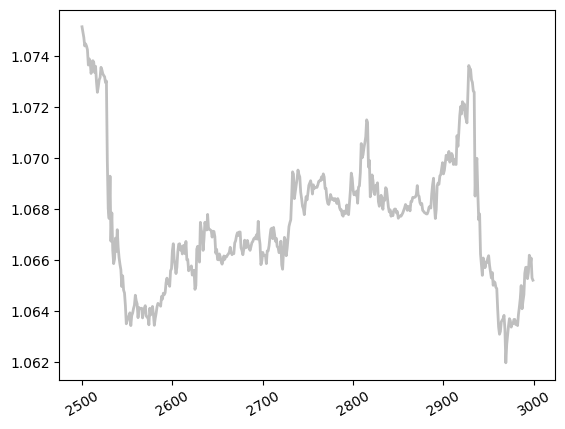

In [85]:
fig, ax = plt.subplots()
plt.xticks(rotation=30)
price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)

plt.show()

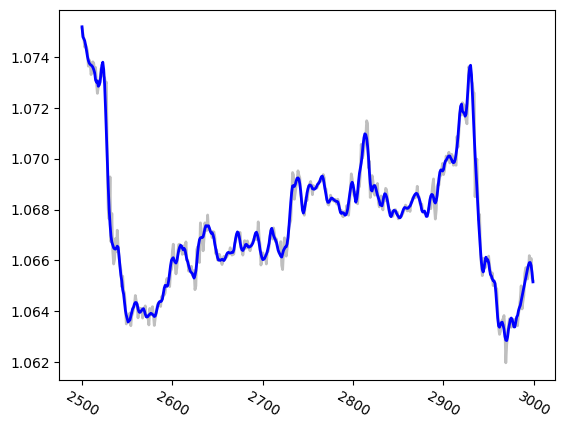

In [86]:
df['close_smooth'] = savgol_filter(df.close, 30, 10)
fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df.index, df.close_smooth, c='b', lw=2, zorder=5)

496


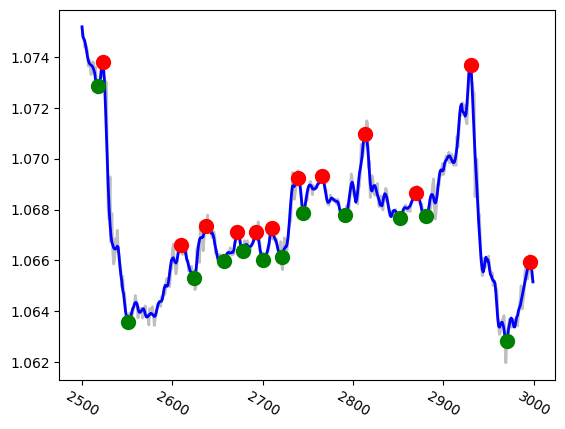

In [94]:
df['close_smooth'] = savgol_filter(df.close, 30, 10)
fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df.index, df.close_smooth, c='b', lw=2, zorder=5)

atr = df.atr.iloc[-1]

peaks_idx,_ = find_peaks(df.close_smooth, distance = 15, width = 2, prominence= atr)

# print(df.close_smooth.iloc[peaks_idx[0]])

print(peaks_idx[-1])

troughs_idx,_ = find_peaks(-1*df.close_smooth, distance = 15, width = 2, prominence= atr)

peaks, = ax.plot(df.index[peaks_idx], df.close_smooth.iloc[peaks_idx], \
                c="r", linestyle="None", markersize=10.0, marker="o", zorder=10)

troughs, = ax.plot(df.index[troughs_idx], df.close_smooth.iloc[troughs_idx], \
                c="g", linestyle="None", markersize=10.0, marker="o", zorder=10)

plt.show()